# IMAGEN Analysis #
This is the master file for aggregating the various components of the imagen analysis. Much of the actual processing is accomplished in related python and R files (which get sourced, called, and presented here).

## Table of Contents: ##
* [Outline](#outline)
* [Summary Stats for MID and SST Params](#summary stats for mid and sst params)
* [Mean Shift and Normalize](#mean shift and normalize)
* [Shuffle Test](#Shuffle Test)
* [Further Data Subdivision](#further data subdivision)
* [Missing Data: Age 14](#missing data age 14)
* [Impute Features](#impute features)
* [Clean Up Features](#clean up features)
* [Misc. Correlations](#misc correlations)
* [Canonical Correlations Analysis: Age 14](#canonical correlations analysis age 14)
* [Principle Components Analysis](#principle components analysis)
* [CCA Across Baseline and Follow Up](#cca across baseline and follow up)
* [CCA from Age 14 Tasks to Age 18 Survey](#cca from age 14 tasks to age 18 survey)
* [Gaussian Mixture Model](#gaussian mixture model)

## Outline <a class="anchor" id="outline"></a>
**The following should be determined in this file:**
- What data exists, what subset is/ shoudl be used, and its raw state.
- How much needs to be interpolated or removed, how, and what other QC needs to be done.
    - How important statistics of the data are changed by these processes.
- What analyses make the most sense, and what we roughly expect from them

**It also includes...**
- Attempted reproductions of others' work
- Sanity checks on work done here and on the data

**Actual steps in achieving these goals include:**
- Stably inducting and partitioning the data
- 

## General Config
This is misc. stuff that gets used in the analysis below.

In [2]:
show_views <- FALSE  # Toggle slice views throughout
shuffle    <- FALSE  # Shuffle data for shuffle testing
re_read    <- FALSE   # Re-read the data

library(ggplot2)
library(reshape2)
library(mice)

## Read in Subject Data ##

In [3]:
options(width=100)

In [4]:
# Actually read all the files: (Time consuming!)
if (re_read) {
    source('import_data.r')
    data <- import_data()
    saveRDS(data,'raw_data.rds')
} else {
    # Read saved R data file:
    data  <- readRDS('raw_data.rds')
    nsubj <- nrow(data$raw)
}

## Misc. Correlations  <a class="anchor" id="misc correlations"></a>##

In [1]:
#pairwise_correlations <- cor(merge(data_14_task.imputed,data_14_survey.imputed))
pairwise_correlations <- cor(imputed_df, use="pairwise.complete.obs")

library(lattice)
scale <- list(x=list(rot=90))
options(repr.plot.width=9, repr.plot.height=7.5)
levelplot(pairwise_correlations, scales=scale, main='Pairwise Measure Correlations'  , xlab = '', ylab = '',
         at=seq(-1, 1, length.out=100))
   #par.settings=RdBuTheme(), at=seq(-max(abs(cellStats(pairwise_correlatoins, range))),
   #                                  max(abs(cellStats(pairwise_correlations, range))), len=100))

ERROR: Error in is.data.frame(x): object 'imputed_df' not found


## Canonical Correlations Analysis, Age 14  <a class="anchor" id="canonical correlations analysis age 14"></a>##

In [101]:
source('cca_wrapper.r')
cca_wrapper(data_14_task.imputed, data_14_survey.imputed[setdiff(colnames(data_14_survey.imputed),'age_14')])

Loading required package: fda
Loading required package: Matrix

Attaching package: ‘fda’

The following object is masked from ‘package:graphics’:

    matplot

Loading required package: fields
Loading required package: spam
Loading required package: grid
Spam version 1.4-0 (2016-08-29) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps

Attaching package: ‘CCA’

The following object is masked from ‘package:mice’:

    cc



ERROR: Error in qr.default(x): NA/NaN/Inf in foreign function call (arg 1)


In [33]:
#data_14_task.imputed[c('GB_SSRT_14','sigma_stop_14','mu_targ_dur_co_14')]
#data_14_survey.imputed['alc_14']

## Principle Components Analysis  <a class="anchor" id="principle components analysis"></a>##

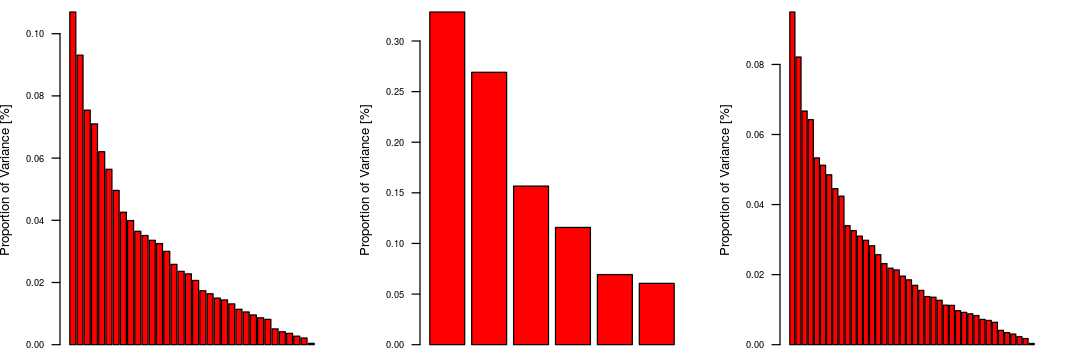

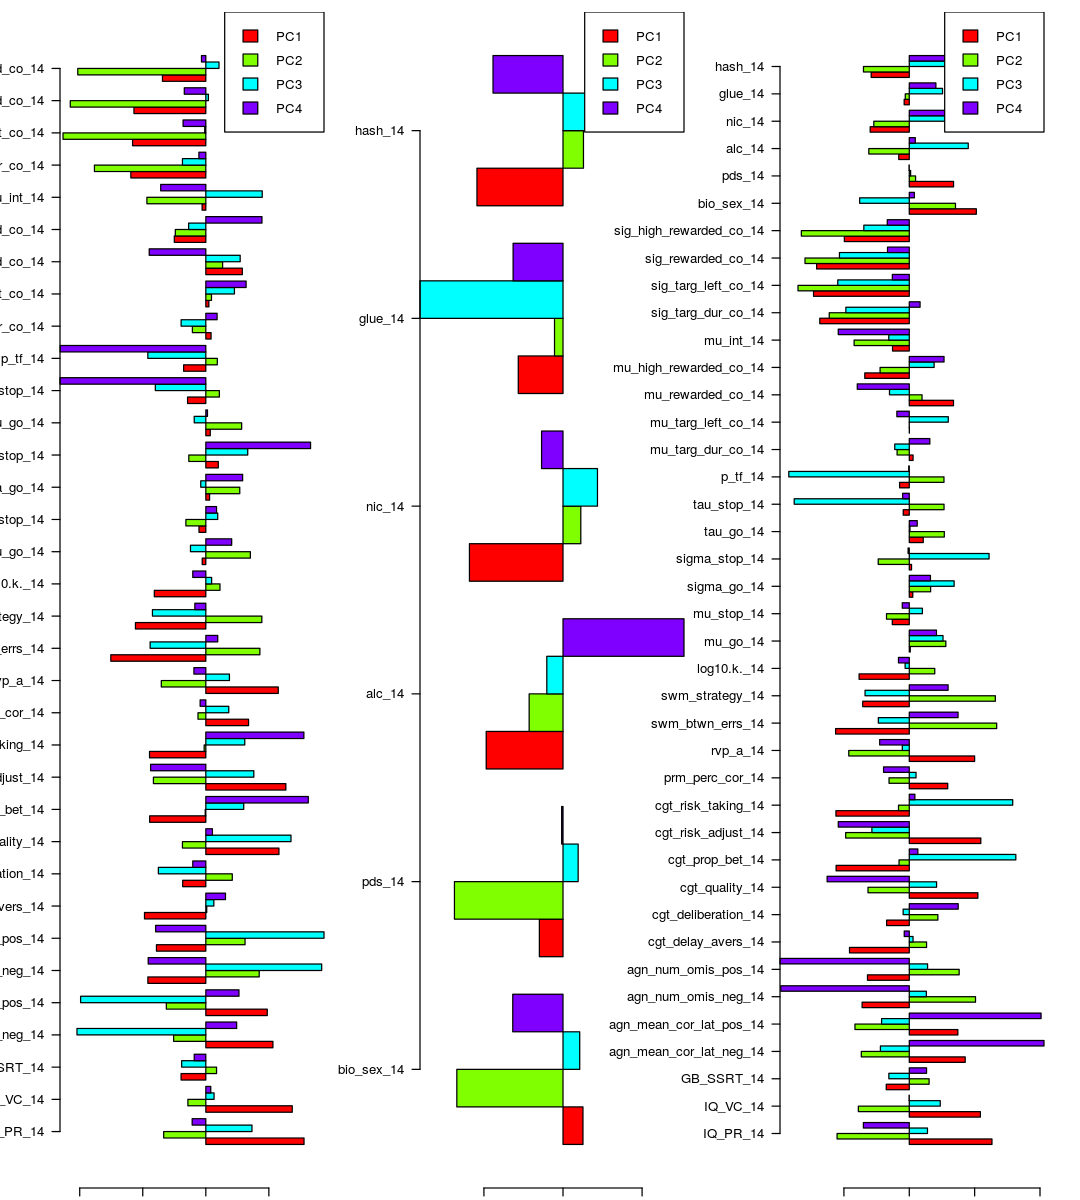

In [34]:
# Perform Task Data PCA:
task_pca      <- prcomp(data_14_task.imputed, center = TRUE, scale. = TRUE)
task_pca_pvar <- task_pca$sdev^2/sum(task_pca$sdev^2)

# Perform Survey Data PCA:
survey_pca      <- prcomp(data_14_survey.imputed, center = TRUE, scale. = TRUE)
survey_pca_pvar <- survey_pca$sdev^2/sum(survey_pca$sdev^2)

# Perform All Data PCA:
task_survey_pca      <- prcomp(imputed_df, center = TRUE, scale. = TRUE) 
task_survey_pca_pvar <- task_survey_pca$sdev^2/sum(task_survey_pca$sdev^2)


### PLOT THE VARIATION CAPTURED BY PCAs:
par(mfrow=c(1,3), mai = c(0.1, 0.5, 0.1, 0.3))
options(repr.plot.width=9, repr.plot.height=3)

ylab_top <- "Proportion of Variance [%]"

# Task PCA Plot:
barplot(task_pca_pvar,  col=c('red'), las=2, cex.axis=0.7, xlab=c('Principle Components'), ylab=ylab_top)

# Survey PCA Plot:
barplot(survey_pca_pvar,  col=c('red'), las=2, cex.axis=0.7, xlab=c('Principle Components'), ylab=ylab_top)

# Task-Survey PCA Plot: 
barplot(task_survey_pca_pvar,  col=c('red'), las=2, cex.axis=0.7, 
        xlab=c('Principle Components'), ylab=c("Proportion of Variance [%]"))


## PLOT THE LOADINGS FOR EACH PCA:
par(mfrow=c(1,3), mai = c(0.1, 0.5, 0.1, 0.3))
options(repr.plot.width=9, repr.plot.height=10)

barplot(t(task_pca$rotation[,1:4]), main="", horiz=TRUE, beside=TRUE, col=rainbow(4), yaxt='n')
axis(2, labels=colnames(data_14_task.imputed), at=seq(3,n_feat_task*5,by=5), las=2)
legend("topright", legend=c('PC1', 'PC2', 'PC3', 'PC4'), fill = rainbow(4))

barplot(t(survey_pca$rotation[,1:4]), main="", horiz=TRUE, beside=TRUE, col=rainbow(4), yaxt='n')
axis(2, labels=colnames(data_14_survey.imputed), at=seq(3,n_feat_survey*5,by=5), las=2)
legend("topright", legend=c('PC1', 'PC2', 'PC3', 'PC4'), fill = rainbow(4))

barplot(t(task_survey_pca$rotation[,1:4]), main="", horiz=TRUE, beside=TRUE, col=rainbow(4), yaxt='n')
axis(2, labels=colnames(imputed_df), at=seq(3,(n_feat_task + n_feat_survey)*5,by=5), las=2)
legend("topright", legend=c('PC1', 'PC2', 'PC3', 'PC4'), fill = rainbow(4))

## CCA Across Baseline and Follow Up <a class="anchor" id="cca across baseline and follow up"></a>##
Double check that the imputed data and the age 18 survey data can still be used properly in case of shuffle.

In [35]:
dim(imputed_df[complete.cases(raw_df[,'X8a.life.alc_18']),])[1] == 
    dim(data_18_survey.raw[complete.cases(data_18_survey.raw[,'X8a.life.alc_18']),])[1]

[1] TRUE

#### Drop rows without age 18 Survey Data ###

In [36]:
imputed_df <- imputed_df[complete.cases(raw_df[,'X8a.life.alc_18']),]
imputed_df <- imputed_df[, colSums(imputed_df != 0) > 0]


data_18_survey <- data_18_survey.raw[complete.cases(data_18_survey.raw[,'X8a.life.alc_18']),]
data_18_survey <- data_18_survey[, colSums(data_18_survey != 0) > 0]

dim(imputed_df)
dim(data_18_survey)

#missing_imputed_df     <- get_missing_fracs(imputed_df)
#missing_data_18_survey <- get_missing_fracs(data_18_survey)
#missing_imputed_df
#missing_data_18_survey

[1] 184  40

[1] 184  10

In [37]:
if (shuffle) {
    cnames <- features_18_survey
    for (i in 1:length(cnames)) {
        col  <- cnames[i]
        perm <- sample(1:dim(data_18_survey)[1], replace=TRUE)
        data_18_survey[col] <- data_18_survey[perm,col]
    }
}

 [1] 0.6820407 0.6398398 0.5856104 0.5338877 0.5037131 0.4688033 0.4158528
 [8] 0.3531307 0.3287040 0.3051980
Wilks' Lambda, using F-approximation (Rao's F):
                 stat    approx df1       df2    p.value
1 to 10:   0.05059272 1.1964791 400 1331.2073 0.01149856
2 to 10:   0.09459756 1.0606792 351 1208.8376 0.24004127
3 to 10:   0.16017058 0.9381811 304 1083.9952 0.74971428
4 to 10:   0.24376842 0.8398140 259  956.6663 0.95663227
5 to 10:   0.34095204 0.7617233 216  826.8567 0.99242074
6 to 10:   0.45687298 0.6791676 175  694.5981 0.99897485
7 to 10:   0.58556685 0.5924821 136  559.9560 0.99986070
8 to 10:   0.70800459 0.5223917  99  423.0384 0.99992753
9 to 10:   0.80887196 0.4964924  64  284.0000 0.99946010
10 to 10:  0.90685419 0.4738056  31  143.0000 0.99148339


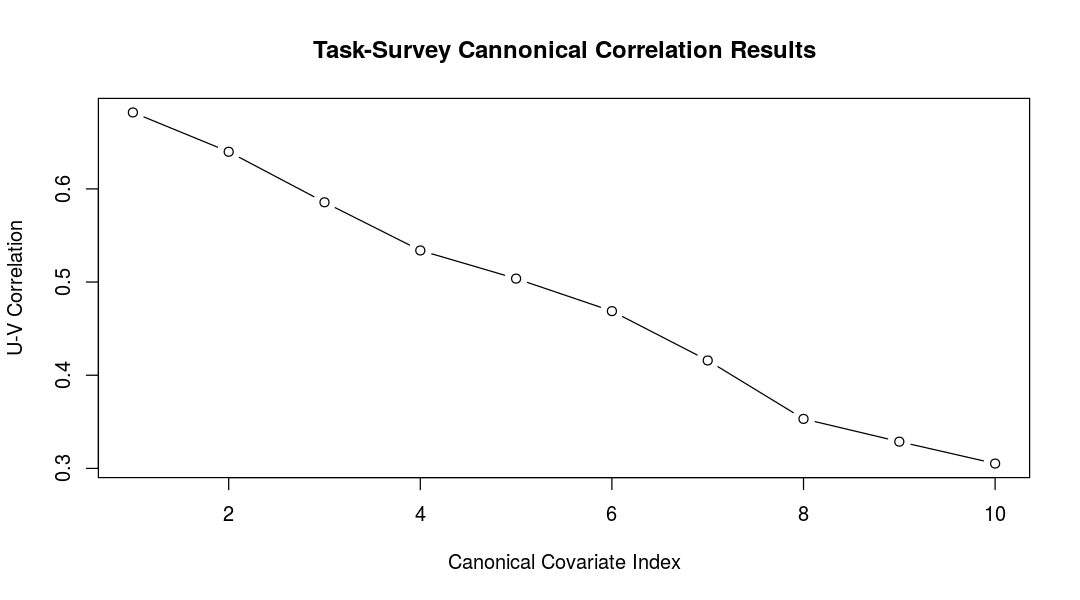

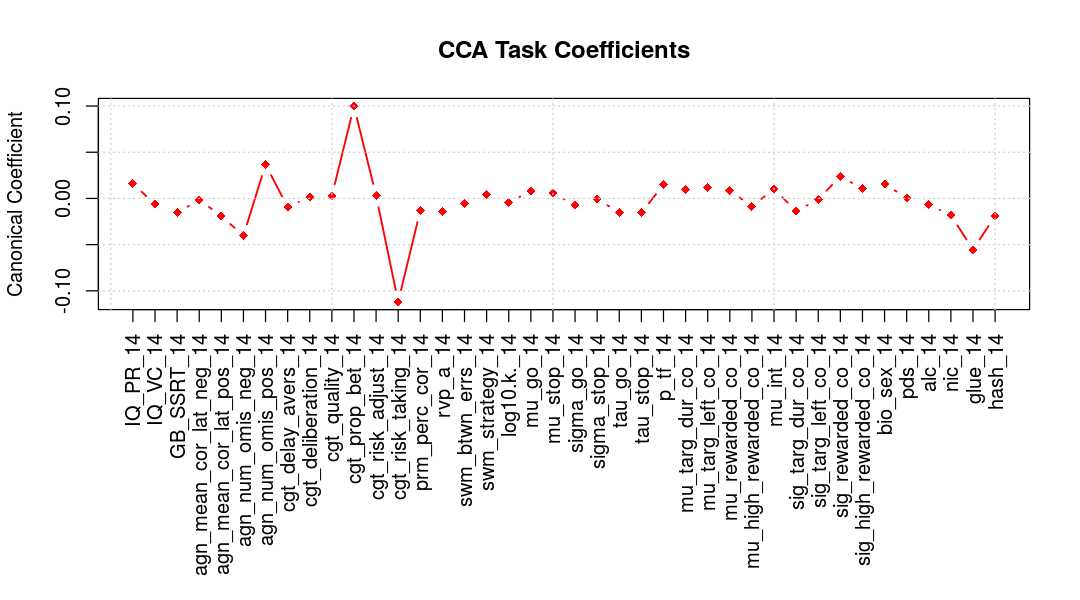

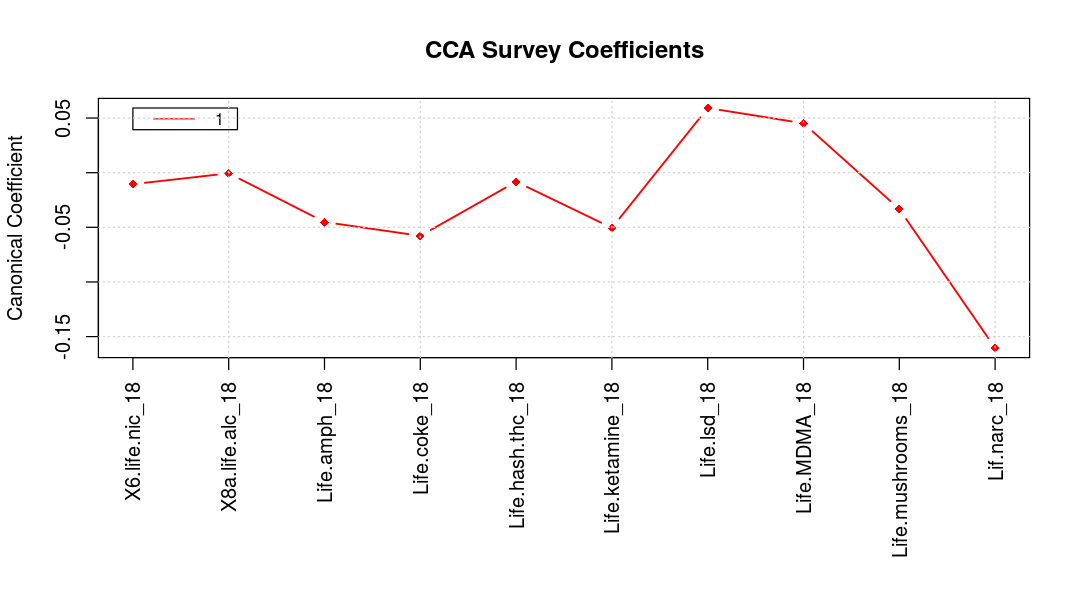

In [38]:
analyze_cca(imputed_df, data_18_survey)

## CCA From Age 14 Tasks to Age 18 Survey <a class="anchor" id="cca from age 14 tasks to age 18 survey"></a>##

In [39]:
colSums(data_18_survey)
#'Life.GHB_18','Life.tranq_18','Life.glue_18'

colSums(data_14_survey.imputed)
#'anabolic_14','mdma_14','tranq_14','heroin_14'

X6.life.nic_18   X8a.life.alc_18      Life.amph_18      Life.coke_18 
              493               937                19                27 
 Life.hash.thc_18  Life.ketamine_18       Life.lsd_18      Life.MDMA_18 
              305                 7                 8                45 
Life.mushrooms_18       Lif.narc_18 
                8                 8

bio_sex_14     pds_14     alc_14     nic_14    glue_14    hash_14 
       137       1015        594        173         16         45

In [40]:
row_sums <- rowSums(data_18_survey[c(setdiff(colnames(data_18_survey),c('age_18','X6.life.nic_18','X8a.life.alc_18')))])

In [41]:
new_df <- data_18_survey[c('X6.life.nic_18','X8a.life.alc_18')]
new_df['cum_other_18'] <- row_sums
head(new_df)
dim(new_df)
dim(imputed_df)

,X6.life.nic_18,X8a.life.alc_18,cum_other_18
2,3,6,2
3,0,6,2
4,4,6,2
5,6,6,1
6,0,1,0
7,4,6,0


[1] 184   3

[1] 184  40

 [1] 0.5580058 0.5544920 0.4648113 0.4117616 0.3862600 0.3632058 0.3328271
 [8] 0.2717454 0.2478930 0.1772473
Wilks' Lambda, using F-approximation (Rao's F):
                stat    approx df1       df2    p.value
1 to 10:   0.1716771 1.1770013 250 1413.2475 0.04150773
2 to 10:   0.2493025 1.0647981 216 1288.7103 0.26344121
3 to 10:   0.3599835 0.9094578 184 1160.9513 0.79057897
4 to 10:   0.4591917 0.8234566 154 1029.7350 0.93585896
5 to 10:   0.5529416 0.7639856 126  894.8168 0.97120063
6 to 10:   0.6499054 0.6981291 100  755.9565 0.98746682
7 to 10:   0.7486686 0.6149738  76  612.9435 0.99543133
8 to 10:   0.8419328 0.5125778  54  465.6349 0.99843297
9 to 10:   0.9090631 0.4509124  34  314.0000 0.99686862
10 to 10:  0.9685834 0.3203018  16  158.0000 0.99427531


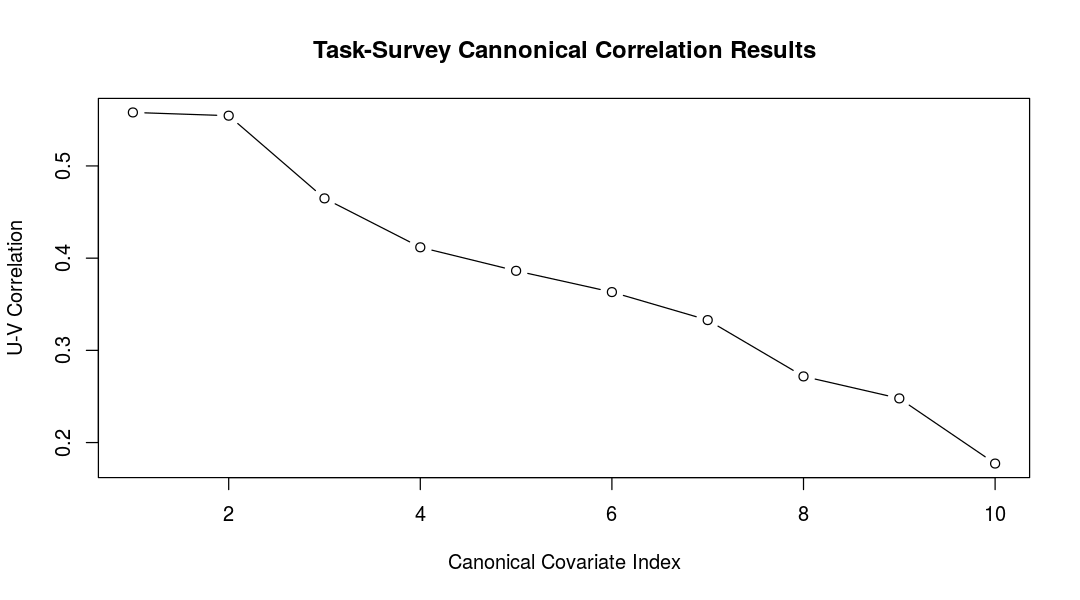

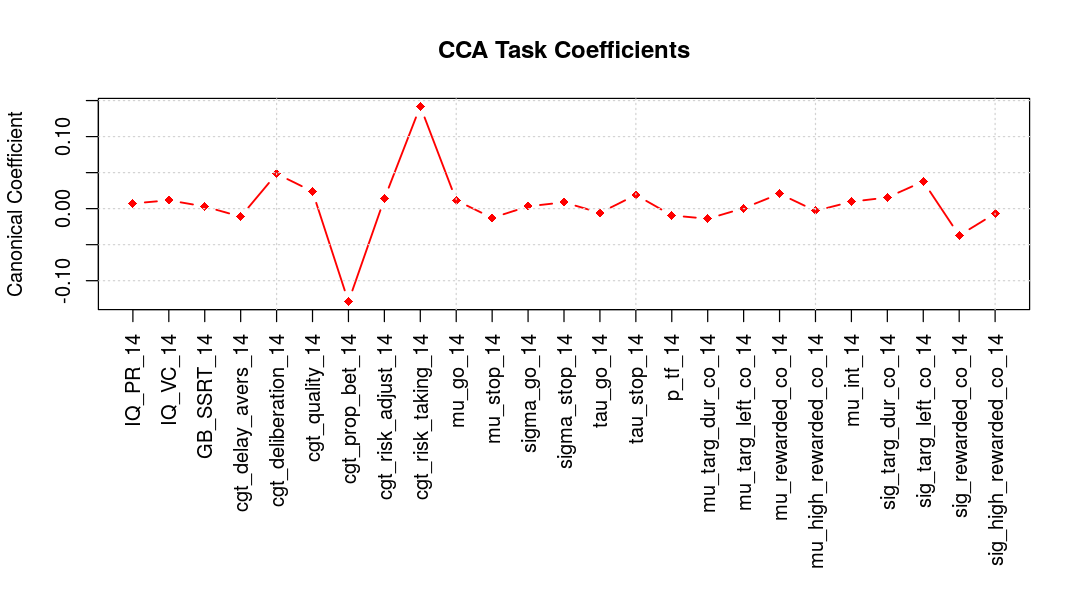

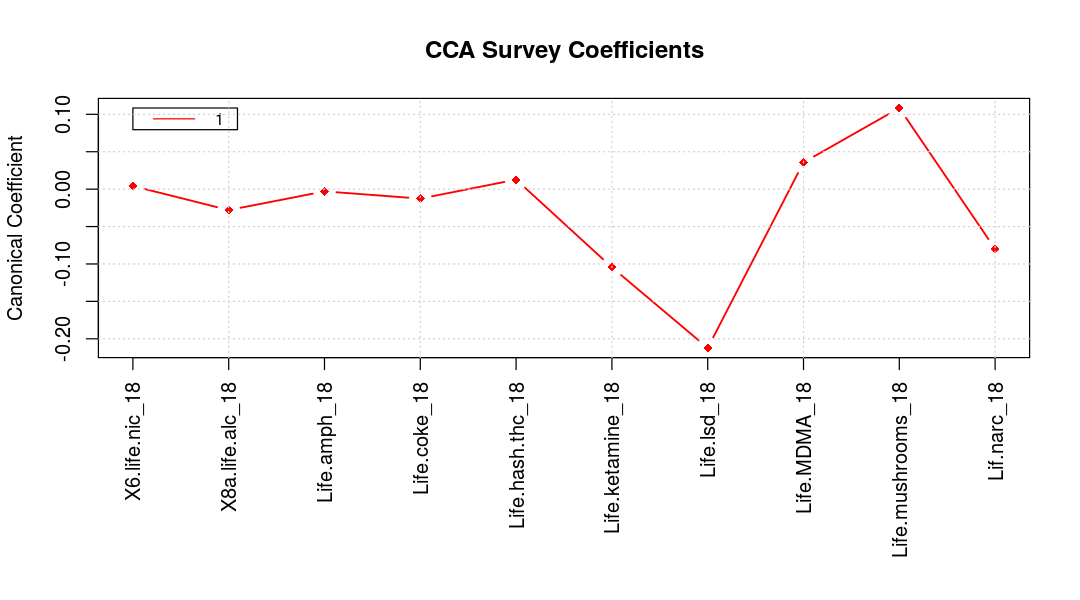

In [42]:
#head(imputed_df[features_14_task])
analyze_cca(imputed_df[c('IQ_PR_14', 'IQ_VC_14', 'GB_SSRT_14',
       'cgt_delay_avers_14',
       'cgt_deliberation_14',
       'cgt_quality_14',
       'cgt_prop_bet_14',
       'cgt_risk_adjust_14',
       'cgt_risk_taking_14',
       'mu_go_14', 'mu_stop_14', 'sigma_go_14','sigma_stop_14','tau_go_14','tau_stop_14','p_tf_14',
       'mu_targ_dur_co_14', 'mu_targ_left_co_14',  'mu_rewarded_co_14', 
       'mu_high_rewarded_co_14', 'mu_int_14',
       'sig_targ_dur_co_14','sig_targ_left_co_14','sig_rewarded_co_14',
       'sig_high_rewarded_co_14')], data_18_survey[c(setdiff(colnames(data_18_survey),c('age_18')))])

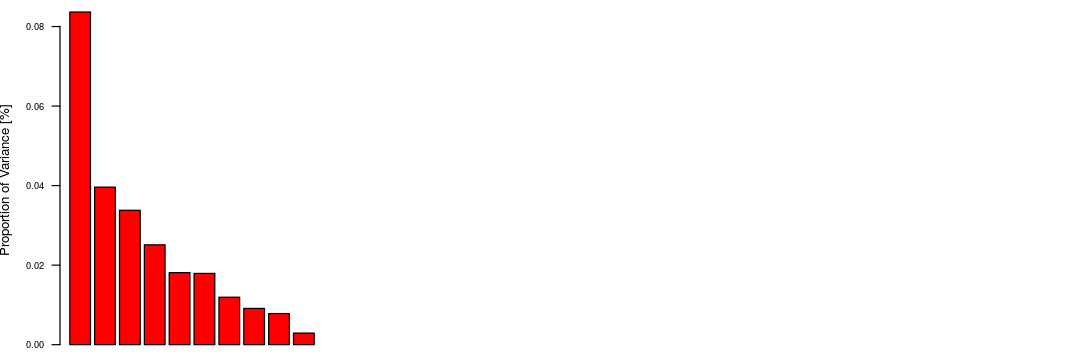

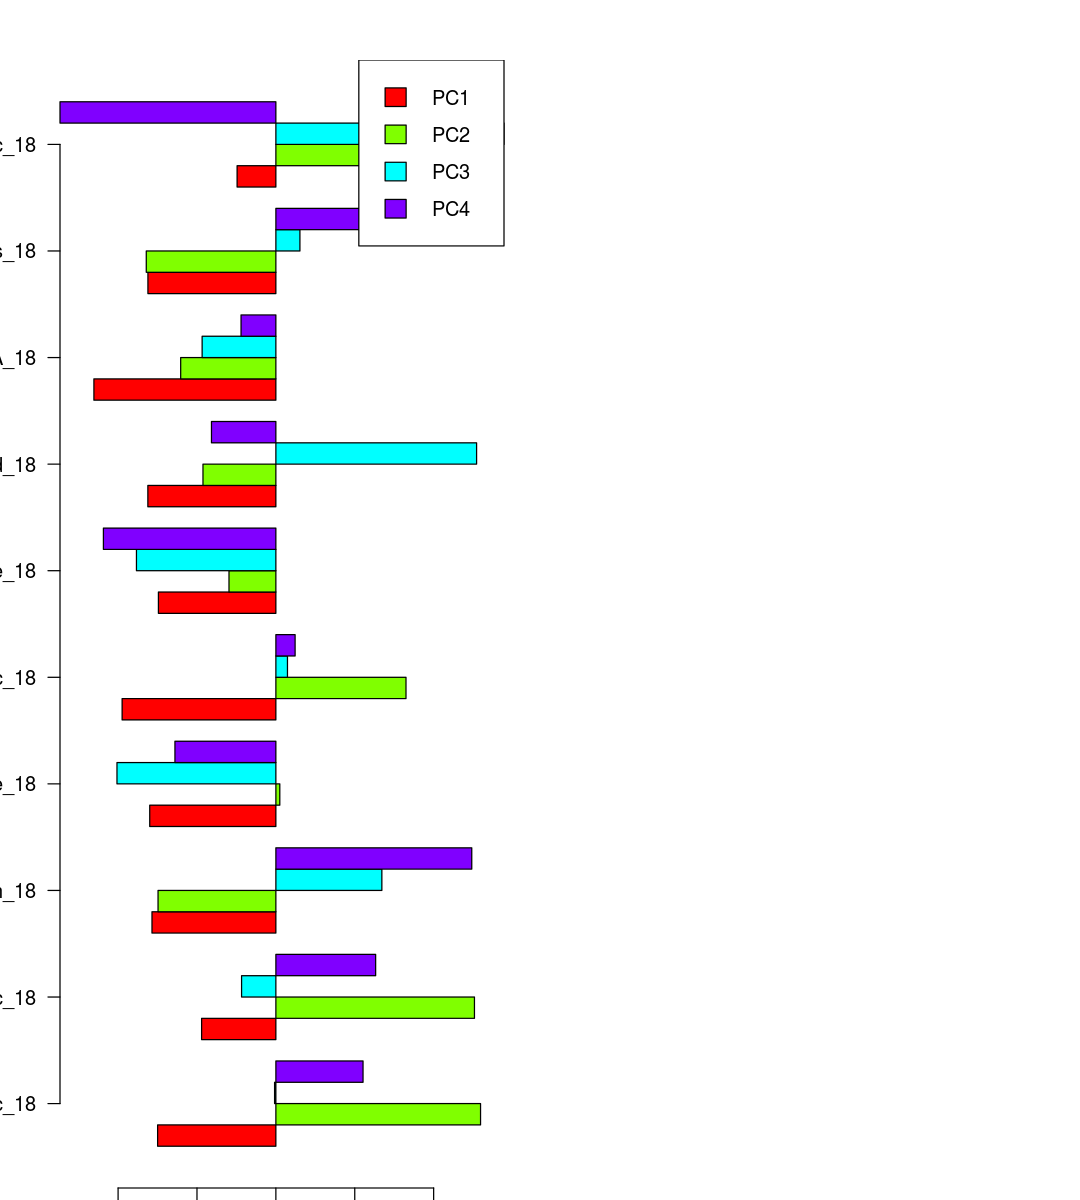

In [52]:

# Perform All Data PCA:
survey_18_pca      <- prcomp(data_18_survey[c(setdiff(colnames(data_18_survey),c('age_18')))], center = TRUE, scale. = TRUE) 
survey_18_pca_pvar <- survey_18_pca$sdev^2/sum(task_survey_pca$sdev^2)


### PLOT THE VARIATION CAPTURED BY PCAs:
par(mfrow=c(1,3), mai = c(0.1, 0.5, 0.1, 0.3))
options(repr.plot.width=9, repr.plot.height=3)

ylab_top <- "Proportion of Variance [%]"

# Task-Survey PCA Plot: 
barplot(survey_18_pca_pvar,  col=c('red'), las=2, cex.axis=0.7, 
        xlab=c('Principle Components'), ylab=c("Proportion of Variance [%]"))


## PLOT THE LOADINGS FOR EACH PCA:
par(mfrow=c(1,2), mai = c(0.1, 0.5, 0.5, 0.3))
options(repr.plot.width=9, repr.plot.height=10)

barplot(t(survey_18_pca$rotation[,1:4]), main="", horiz=TRUE, beside=TRUE, col=rainbow(4), yaxt='n')
axis(2, labels=c(setdiff(colnames(data_18_survey),c('age_18'))), at=seq(3,(10)*5,by=5), las=2)
legend("topright", legend=c('PC1', 'PC2', 'PC3', 'PC4'), fill = rainbow(4))

In [ ]:
#analyze_cca(imputed_df[features_14_survey], data_18_survey)
rando <- sample(1:250)

In [ ]:
fairly_heavy_msk <- new_df['cum_other_18'] >= 4
sum(fairly_heavy_msk, na.rm=T)
dim(raw_df[features_14_task])

fairly_heavy_msk <- factor(as.numeric(fairly_heavy_msk[1:250]))
#raw_df[features_14_task][rando,]

feature_list <- c('IQ_PR_14', 'IQ_VC_14', 'GB_SSRT_14','cgt_delay_avers_14',
       'agn_mean_cor_lat_neg_14',
       'agn_mean_cor_lat_pos_14',
       'agn_num_omis_neg_14',
       'agn_num_omis_pos_14',
       'cgt_deliberation_14',
       'cgt_quality_14',
       'cgt_prop_bet_14',
       'cgt_risk_adjust_14',
       'cgt_risk_taking_14',
       'mu_go_14', 'mu_stop_14', 'sigma_go_14','sigma_stop_14','tau_go_14','tau_stop_14','p_tf_14',
       'mu_targ_dur_co_14', 'mu_targ_left_co_14',  'mu_rewarded_co_14', 
       'mu_high_rewarded_co_14', 'mu_int_14',
       'sig_targ_dur_co_14','sig_targ_left_co_14','sig_rewarded_co_14',
       'sig_high_rewarded_co_14')

feats <- raw_df[feature_list]
feats <- feats[rand,]
labs  <- fairly_heavy_msk[rand]

library(e1071)
classifier <- naiveBayes(feats, labs, na.action=na.pass)
table(predict(classifier, feats), labs, dnn=list('predicted','actual'))
#preds <- predict(classifier,feats)

In [ ]:
options(repr.plot.width=9, repr.plot.height=4)

clusters <- hclust(dist(feats))
plot(clusters)

clusters <- hclust(dist(imputed_df))
plot(clusters, xlab="Subjects")

In [ ]:
cgt_to_18_df <- cbind(imputed_df[c(
       'cgt_delay_avers_14',
       'cgt_deliberation_14',
       'cgt_quality_14',
       'cgt_prop_bet_14',
       'cgt_risk_adjust_14',
       'cgt_risk_taking_14')],
        data_18_survey)


#pairwise_correlations <- cor(merge(data_14_task.imputed,data_14_survey.imputed))
pairwise_correlations <- cor(cgt_to_18_df)

library(lattice)
scale <- list(x=list(rot=90))
options(repr.plot.width=5, repr.plot.height=5)
levelplot(pairwise_correlations, scales=scale, main='Task-Survey Correlations'  , xlab = '', ylab = '',
         at=seq(-1, 1, length.out=100))

## Gaussian Mixture Model <a class="anchor" id="gaussian mixture model"></a> ##

In [ ]:
library(rtkore)
library(MixAll)

#model <- list()
#for (i in 1:7) {
#    model[[i]] <- clusterDiagGaussian(data=imputed_df, nbCluster=i, strategy = clusterFastStrategy())
#    summary(model[[i]])
#}

## Classification

In [27]:
# Not sub-setting by impulsivity because there's hardly any training data already
# impulsive_class <- imp_ind < quants[2]

high_rew_quants <- quantile(data$raw['mu_high_rewarded_co_14'], prob=probs, na.rm=TRUE)

high_low_1 <- (data$train['mu_high_rewarded_co_14'] > high_rew_quants[2]) & (data$train['stn_std'] < stn_quants[2])
low_high_1 <- (data$train['mu_high_rewarded_co_14'] < high_rew_quants[2]) & (data$train['stn_std'] > stn_quants[2])

high_low_1[is.na(high_low_1)] <- FALSE
low_high_1[is.na(low_high_1)] <- FALSE

inclusion_msk <- high_low_1 | low_high_1

class_labels <- high_low_1[inclusion_msk,]

data$raw['substance_ag'] <- data$raw['alc_14'] + data$raw['nic_14'] + data$raw['hash_14']

features <- c('GB_SSRT_14', 'cgt_risk_taking_14', 'cgt_prop_bet_14')

library(e1071)
classifier <- naiveBayes(data$raw[data$train_inds,][features][inclusion_msk,], class_labels, na.action=na.pass)
table(predict(classifier, data$raw[data$train_inds,][features][inclusion_msk,]), class_labels, dnn=list('predicted','actual'))


high_rew_quants <- quantile(data$raw['mu_high_rewarded_co_14'], prob=probs, na.rm=TRUE)

high_low_1 <- (data$test['mu_high_rewarded_co_14'] > high_rew_quants[2]) & (data$test['stn_std'] < stn_quants[2])
low_high_1 <- (data$test['mu_high_rewarded_co_14'] < high_rew_quants[2]) & (data$test['stn_std'] > stn_quants[2])

high_low_1[is.na(high_low_1)] <- FALSE
low_high_1[is.na(low_high_1)] <- FALSE

inclusion_msk <- high_low_1 | low_high_1

class_labels <- high_low_1[inclusion_msk,]

table(predict(classifier, data$raw[data$test_inds,][features][inclusion_msk,]), class_labels, dnn=list('predicted','actual'))

         actual
predicted FALSE TRUE
    FALSE     8    7
    TRUE     26   37

         actual
predicted FALSE TRUE
    FALSE     4    4
    TRUE     20   24